In [57]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import sys
import os
import numpy as np
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


'/home/cusp/gc2300/PUIdata'

In [63]:
!wget -O - 'https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip' > 'jan2015.zip'
!wget -O - 'https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip' > 'jun2015.zip'

--2017-10-04 18:34:43--  https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip
Resolving s3.amazonaws.com... 52.216.82.195
Connecting to s3.amazonaws.com|52.216.82.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7009614 (6.7M) [application/zip]
Saving to: “STDOUT”

100%[======================================>] 7,009,614   --.-K/s   in 0.1s    

2017-10-04 18:34:44 (47.2 MB/s) - written to stdout [7009614/7009614]

--2017-10-04 18:34:44--  https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip
Resolving s3.amazonaws.com... 52.216.82.195
Connecting to s3.amazonaws.com|52.216.82.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22888858 (22M) [application/zip]
Saving to: “STDOUT”

100%[======================================>] 22,888,858  45.8M/s   in 0.5s    

2017-10-04 18:34:44 (45.8 MB/s) - written to stdout [22888858/22888858]



In [67]:
jan2015 = pd.DataFrame.from_csv('/wingrdp/homedirs/gc2300/jan2015.zip', index_col=None)

In [68]:
jan2015.head()

tripduration      starttime       stoptime  start station id  \
0          1346  1/1/2015 0:01  1/1/2015 0:24               455   
1           363  1/1/2015 0:02  1/1/2015 0:08               434   
2           346  1/1/2015 0:04  1/1/2015 0:10               491   
3           182  1/1/2015 0:04  1/1/2015 0:07               384   
4           969  1/1/2015 0:05  1/1/2015 0:21               474   

        start station name  start station latitude  start station longitude  \
0          1 Ave & E 44 St               40.750020               -73.969053   
1          9 Ave & W 18 St               40.743174               -74.003664   
2     E 24 St & Park Ave S               40.740964               -73.986022   
3  Fulton St & Waverly Ave               40.683178               -73.965964   
4          5 Ave & E 29 St               40.745168               -73.986831   

   end station id             end station name  end station latitude  \
0             265     Stanton St & Chrystie St             40.722293   
1             482              W 15 St & 7 Ave             40.739355   
2             505              6 Ave & W 33 St             40.749013   
3             399  Lafayette Ave & St James Pl             40.688515   
4             432            E 7 St & Avenue A             40.726218   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.991475   18660  Subscriber      1960.0       2  
1             -73.999318   16085  Subscriber      1963.0       1  
2             -73.988484   20845  Subscriber      1974.0       1  
3             -73.964763   19610  Subscriber      1969.0       1  
4             -73.983799   20197  Subscriber      1977.0       1

IDEA: Women's bike riding duration are different with men's.
The confidence level is 0.05

Null hypothesis: Women's mean bike riding duration are equal to men's.
Alternative hypothesis: Women's mean bike riding duration are different with men's.

In [88]:
jan2015[jan2015.gender==1].tripduration.head() #male

1    363
2    346
3    182
4    969
6    152
Name: tripduration, dtype: int64

In [114]:
print(jan2015[jan2015.gender==1].tripduration.mean()) #male

622.560400239


In [90]:
jan2015[jan2015.gender==2].tripduration.head() #female

0     1346
5      496
7     1183
27    1639
43    1114
Name: tripduration, dtype: int64

In [91]:
print(jan2015[jan2015.gender==2].tripduration.mean()) #female

692.379379187


In [92]:
import scipy.stats as stats
sample1=jan2015[jan2015.gender==1].tripduration
sample2=jan2015[jan2015.gender==2].tripduration
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)

In [93]:
t_stat

-16.7913850945619

In [94]:
p_val

3.6581810209799719e-63

p value is less than 0.05, H0 is rejected. Women's bike riding duration is dfferent with men's.

In [135]:
sample1=np.asarray(sample1)
sample2=np.asarray(sample2)

In [140]:
sample2.max()

41961

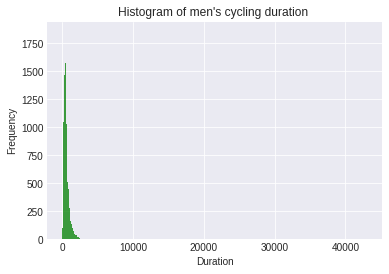

In [145]:
n, bins, patches = plt.hist(sample1, 10000, facecolor='g', alpha=0.75)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title("Histogram of men's cycling duration ")
plt.grid(True)
plt.show()

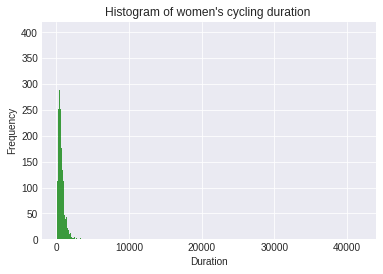

In [146]:
n, bins, patches = plt.hist(sample2, 10000, facecolor='g', alpha=0.75)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title("Histogram of women's cycling duration ")
plt.grid(True)
plt.show()

In [ ]:
#The extreme value influences mean